# Analysis 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
from datetime import datetime
import statsmodels.api as sm
from functools import reduce

import warnings
warnings.filterwarnings('ignore')

In [2]:
from get_dataset import Finance
F = Finance()

### Average Return by Sector

In [3]:
sector_close = F.adj_close_mean_sector()
sector_close.tail()

,Industrials Mean Return,Health Care Mean Return,Information Technology Mean Return,Communication Services Mean Return,Consumer Staples Mean Return,Consumer Discretionary Mean Return,Utilities Mean Return,Financials Mean Return,Materials Mean Return,Real Estate Mean Return,Energy Mean Return
Date,,,,,,,,,,,
2023-03-20,165.668219,223.004504,195.881060,86.019166,113.659247,345.641053,70.924333,130.777639,117.314196,118.571491,75.505218
2023-03-21,167.806439,225.812754,198.376515,87.284167,113.707171,348.903588,69.299000,134.010278,119.179796,117.803116,77.924782
2023-03-22,164.731780,221.450769,195.094241,85.257916,112.552501,344.088864,67.809999,130.813055,116.669999,113.519702,76.273479
2023-03-23,164.063425,221.219999,198.327121,87.152500,112.141667,341.202646,67.131667,129.872639,116.418276,112.928900,75.270435
2023-03-24,164.719452,224.292308,197.255454,87.833334,113.946667,341.797736,69.325667,130.164583,117.420689,115.721334,75.552608


In [94]:
df_returns = round(sector_close.pct_change()*100, 2)
df_returns.index = pd.to_datetime(df_returns.index).date

# df_returns.reset_index(inplace=True)
# df_returns.rename(columns={'index':'Date'}, inplace=True)

end = datetime.now()
begins = pd.to_datetime(datetime(end.year-10, end.month, end.day))

# df_returns = df_returns.loc[df_returns.index >= begins]
df_returns.head()

,Industrials Mean Return,Health Care Mean Return,Information Technology Mean Return,Communication Services Mean Return,Consumer Staples Mean Return,Consumer Discretionary Mean Return,Utilities Mean Return,Financials Mean Return,Materials Mean Return,Real Estate Mean Return,Energy Mean Return
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-2.59,-3.27,-5.53,-4.62,-2.51,0.60,0.51,-4.80,-1.95,-1.28,-1.29
2000-01-05,0.57,0.95,-1.95,-0.26,-0.35,5.27,3.55,0.21,3.14,0.07,1.08
2000-01-06,1.51,1.19,-7.80,-3.15,1.14,-2.23,0.26,2.99,3.24,0.94,4.99
2000-01-07,2.43,7.25,4.42,1.87,4.07,0.93,1.22,4.24,1.52,3.11,2.17


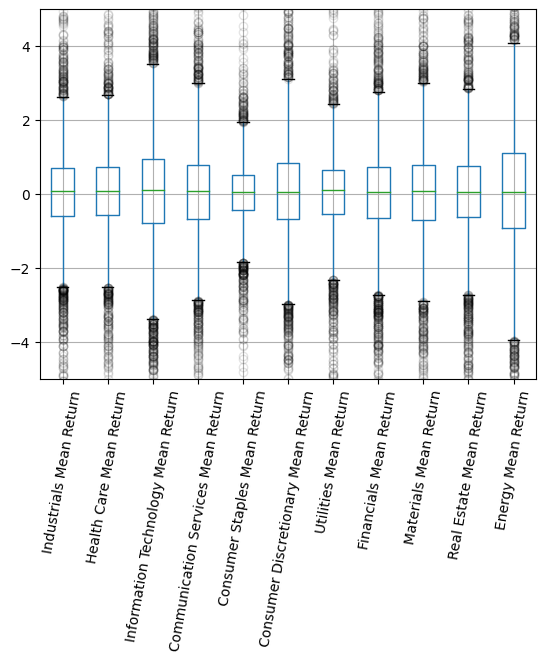

In [95]:
plt.figure()
# begins = 
df_returns.boxplot(flierprops={'alpha': 0.1})
plt.xticks(rotation=80)
plt.ylim([-5,5])
plt.show()

In [96]:
#Total return
Re = {c: [df_returns[c].sum()] for c in df_returns.columns}
Re = pd.DataFrame(Re).T.reset_index()
Re.rename(columns={'index': 'Sector', 0: 'Total Return'}, inplace=True)
Re.sort_values('Total Return', ascending=False)
# for c in df_returns.columns:
#     print('{:>10}{:>10.2f}%'.format(c,df_returns[c].sum()))

,Sector,Total Return
9,Real Estate Mean Return,377.28
5,Consumer Discretionary Mean Return,354.96
10,Energy Mean Return,334.80
1,Health Care Mean Return,313.42
0,Industrials Mean Return,287.31
2,Information Technology Mean Return,274.98
8,Materials Mean Return,266.70
6,Utilities Mean Return,249.95
4,Consumer Staples Mean Return,230.94
3,Communication Services Mean Return,224.12


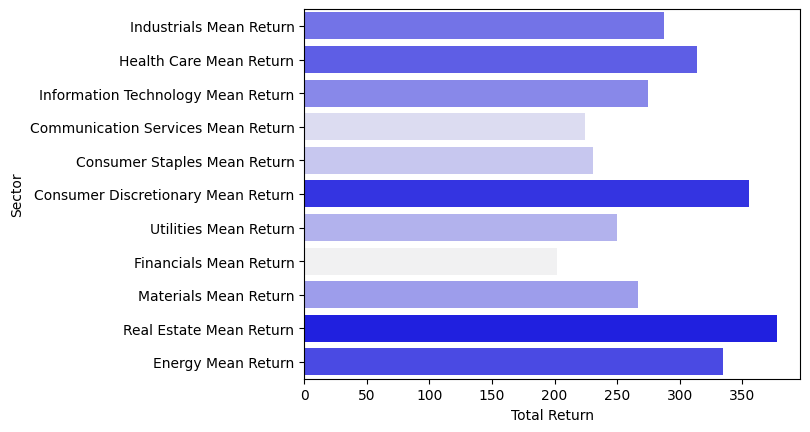

In [97]:
plt.figure()
cmap = sns.color_palette("light:b", Re.shape[0])
rank = Re['Total Return'].values.argsort().argsort() 
sns.barplot(x='Total Return', y='Sector', data=Re, palette=np.array(cmap)[rank])
plt.show()